<a href="https://colab.research.google.com/github/makhmudov-khondamir/makhmudov-khondamir/blob/main/Useful_for_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Normalization/Scaling**
---
Normalization (or scaling) is crucial in various machine learning scenarios, especially when algorithms are sensitive to the scale of features. Here's a detailed overview of when and why you should use normalization:

### **When to Use Normalization**

1. **Distance-Based Algorithms:**
   - **Algorithms**: K-Nearest Neighbors (KNN), Support Vector Machines (SVM) with RBF kernels, and clustering algorithms like K-Means.
   - **Reason**: These algorithms calculate distances between data points. Features on different scales can disproportionately influence the distance calculation, leading to biased results. Normalization ensures that all features contribute equally to the distance metrics.

2. **Gradient-Based Algorithms:**
   - **Algorithms**: Gradient Descent optimization methods used in algorithms like Linear Regression, Logistic Regression, Neural Networks.
   - **Reason**: Features with large scales can cause slow convergence or unstable training due to large gradients. Normalization can help gradient-based algorithms converge faster and more reliably.

3. **Algorithms Assuming Feature Distribution:**
   - **Algorithms**: Linear Regression, Logistic Regression.
   - **Reason**: Some algorithms assume features are normally distributed or scaled similarly. Normalization helps meet these assumptions, improving algorithm performance.

4. **Ensuring Consistency:**
   - **Scenario**: When combining multiple models (e.g., ensemble methods) that have different sensitivities to feature scales.
   - **Reason**: Normalizing features ensures consistency in how different models treat the data, leading to better overall model performance.

### **Types of Normalization and When to Use Them**

1. **Standardization (Z-score Normalization):**
   - **Formula**: \( z = \frac{(x - \mu)}{\sigma} \)
     - \( x \) is the original value.
     - \( \mu \) is the mean of the feature.
     - \( \sigma \) is the standard deviation of the feature.
   - **Use When**:
     - Features have different units or scales.
     - The data follows a Gaussian distribution.
     - You are using algorithms sensitive to feature scaling, like SVM or Gradient Descent.

2. **Min-Max Scaling:**
   - **Formula**: \( x' = \frac{(x - x_{min})}{(x_{max} - x_{min})} \)
     - \( x \) is the original value.
     - \( x_{min} \) and \( x_{max} \) are the minimum and maximum values of the feature.
   - **Use When**:
     - You need features in a bounded range (e.g., 0 to 1).
     - Algorithms assume features are in a specific range, such as Neural Networks.

3. **Robust Scaling:**
   - **Formula**: \( x' = \frac{(x - \text{median})}{\text{IQR}} \)
     - IQR (Interquartile Range) is the range between the 25th and 75th percentiles.
   - **Use When**:
     - Your data contains outliers.
     - Robust scaling is less sensitive to outliers compared to standardization.

4. **Unit Vector Transformation:**
   - **Formula**: Transforming each feature vector to have unit norm.
   - **Use When**:
     - You are working with sparse data or text data (e.g., text classification with TF-IDF features).
     - Useful in algorithms that rely on vector magnitudes.

### **Example of Normalization Process**

**Scenario**: You are using K-Nearest Neighbors (KNN) for a classification problem, and your dataset has features with different scales.

**Steps:**

1. **Load and Prepare Data:**
   ```python
   import pandas as pd
   from sklearn.model_selection import train_test_split
   from sklearn.preprocessing import StandardScaler

   df = pd.read_csv('your_dataset.csv')
   X = df.drop(['target'], axis=1)
   y = df['target']
   ```

2. **Normalize Features:**
   ```python
   scaler = StandardScaler()
   X_normalized = scaler.fit_transform(X)
   ```

3. **Split Data:**
   ```python
   X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)
   ```

4. **Train and Evaluate Model:**
   ```python
   from sklearn.neighbors import KNeighborsClassifier
   model = KNeighborsClassifier(n_neighbors=5)
   model.fit(X_train, y_train)
   predictions = model.predict(X_test)
   ```

5. **Evaluate Performance:**
   ```python
   from sklearn.metrics import classification_report
   print(classification_report(y_test, predictions))
   ```

### **Summary**

- **Normalization is essential** for algorithms sensitive to feature scales and distance metrics.
- **Select the appropriate normalization method** based on the algorithm you are using and the characteristics of your data.
- **Ensure consistency** across models if combining different types of algorithms.

Feel free to reach out if you have more questions or need help with specific aspects of normalization!

# 2.The concepts of **true positives**, **false positives**, **true negatives**, and **false negatives**:
---
### Basic Concepts

1. **True Positive (TP):** These are the cases where the model correctly predicts the positive class.
   - **Example:** If the model predicts a patient should receive Drug X, and that patient actually needed Drug X, it’s a true positive for Drug X.

2. **False Positive (FP):** These are the cases where the model incorrectly predicts the positive class.
   - **Example:** If the model predicts Drug X for a patient who actually needed Drug Y, it’s a false positive for Drug X.

3. **True Negative (TN):** These are the cases where the model correctly predicts the negative class (i.e., the case does not belong to the positive class).
   - **Example:** If the model predicts that a patient should not receive Drug X (and indeed the patient does not need Drug X), it’s a true negative for Drug X.

4. **False Negative (FN):** These are the cases where the model incorrectly predicts the negative class (i.e., the case belongs to the positive class but is predicted as not belonging to it).
   - **Example:** If the model predicts that a patient should not receive Drug X, but the patient actually needed Drug X, it’s a false negative for Drug X.
---
### Visual Representation

Let's use a 2x2 confusion matrix to illustrate these concepts for a binary classification scenario (e.g., predicting if a patient needs Drug X or not):

```
                 Predicted
                Positive   Negative
Actual Positive    TP         FN
       Negative    FP         TN
```
---
### Interpreting the Confusion Matrix

Here’s how you interpret each element in the matrix:

1. **True Positives (TP):** The number of cases where both the actual class and the predicted class are positive.
   - **Drug X example:** If there are 17 cases where the patient needed Drug X and the model correctly predicted Drug X, then the number of true positives for Drug X is 17.

2. **False Positives (FP):** The number of cases where the actual class is negative but the predicted class is positive.
   - **Drug X example:** If the model predicted Drug X for 3 patients who actually needed another drug (e.g., Drug C or Drug Y), then there are 3 false positives for Drug X.

3. **True Negatives (TN):** The number of cases where both the actual class and the predicted class are negative.
   - **Drug X example:** If there are 20 cases where the patient did not need Drug X and the model correctly predicted they did not need it, then the number of true negatives for Drug X is 20.

4. **False Negatives (FN):** The number of cases where the actual class is positive but the predicted class is negative.
   - **Drug X example:** If the model failed to predict Drug X for 2 patients who actually needed it, then there are 2 false negatives for Drug X.
---
### Key Metrics Derived from the Confusion Matrix

1. **Precision (for a specific drug):** The proportion of true positive predictions out of all positive predictions made by the model.
   - **Interpretation:** It tells us how many of the predicted positives were actually positive.

2. **Recall (for a specific drug):** The proportion of true positive predictions out of all actual positive cases.

   - **Interpretation:** It tells us how many of the actual positives were correctly predicted by the model.

3. **F1 Score:** The harmonic mean of precision and recall. It balances precision and recall.
---
### Summary of Your Confusion Matrix

For your 5x5 confusion matrix:

- **Diagonal Values (True Positives):** Indicate how many times the model correctly predicted each drug.
- **Off-Diagonal Values (False Positives and False Negatives):** Indicate the misclassifications, where the model either incorrectly predicted a drug or failed to predict the correct drug.

**Example with your matrix:**

- **Drug X:**
  - **True Positives (TP):** 17 (model correctly predicted Drug X)
  - **False Positives (FP):** 3 (model incorrectly predicted Drug X for patients who needed other drugs)
  - **False Negatives (FN):** 0 (model did not fail to predict Drug X for any patient who actually needed it)



# **3. Understanding `np.linspace` and Gaps**
----
When using `np.linspace(start, stop, num)`, you generate `num` evenly spaced values between `start` and `stop`. The key point to understand is how the spacing between these values is calculated.

**Why Use `num - 1`?**

- Number of Values: `num` specifies how many values you want.
- Number of Gaps: The number of gaps or intervals between these values is `num - 1`.

**Example:**

`np.linspace(0, 10, 5)`

- Values Generated: `[0., 2.5, 5., 7.5, 10.]`
- Intervals: There are 4 gaps between these 5 values.

**Gap Calculation:**

To calculate the spacing:

gap = (stop-start)/(num - 1)

For `np.linspace(0, 10, 5)`:

gap = (10 - 0)/(5 - 1)

**Summary:**

- `num` specifies the total values.
- `num - 1` is used to calculate the spacing because it represents the number of gaps.

This method ensures that your values are evenly distributed over the specified range.

# **4. Why Polynomial Features Are Necessary: A Comparison with Linear Regression**
---
In the world of machine learning, choosing the right model is crucial for capturing complex relationships within data. One common scenario where Linear Regression might fall short is when dealing with non-linear trends. This is where Polynomial Features come into play. Let’s dive into why Polynomial Features can be a game-changer in such cases, and how they compare to Linear Regression.

**Understanding Linear Regression**

Linear Regression is a foundational technique in machine learning, which models the relationship between two variables by fitting a straight line through the data. It works well when the relationship between the features and the target is approximately linear.

**Pros:**
- Simple to understand and implement.
- Effective for linear relationships.

**Cons:**
- Struggles with capturing non-linear trends.
- Limited in modeling complex patterns.

**The Need for Polynomial Features**

When the relationship between variables is more complex, a linear model may not suffice. Polynomial Features allow us to extend Linear Regression to handle non-linear relationships by introducing polynomial terms (e.g., squared, cubic) of the features.

**Benefits of Polynomial Features:**
- **Captures Non-Linear Trends:** By adding polynomial terms, we enable the model to fit curves rather than straight lines, capturing complex patterns in the data.
- **Increased Flexibility:** Allows for a more flexible fit, improving performance on data with intricate relationships.

**A Practical Example**

Consider a dataset where the relationship between the year and GDP is not linear. For instance, economic growth might exhibit trends that are better described by curves rather than straight lines.

Here’s how we can apply Polynomial Features to improve our model:

1. **Generate Polynomial Features:**
   - Transform the original features into polynomial features of a specified degree.

2. **Fit Polynomial Regression:**
   - Train a model using these polynomial features to capture the underlying non-linear relationship.

3. **Compare Predictions:**
   - Evaluate the performance by comparing predictions from Linear Regression and Polynomial Regression.

**Example Code Snippet:**


New Data Predictions:
Year: 2025, Linear Regression Prediction: 5580745946712.8818, Polynomial Regression Prediction: 43427269397807.4062
Year: 2030, Linear Regression Prediction: 6120825377495.7100, Polynomial Regression Prediction: 73460734852835.1562
Year: 2040, Linear Regression Prediction: 7200984239061.3291, Polynomial Regression Prediction: 182439882544032.7188


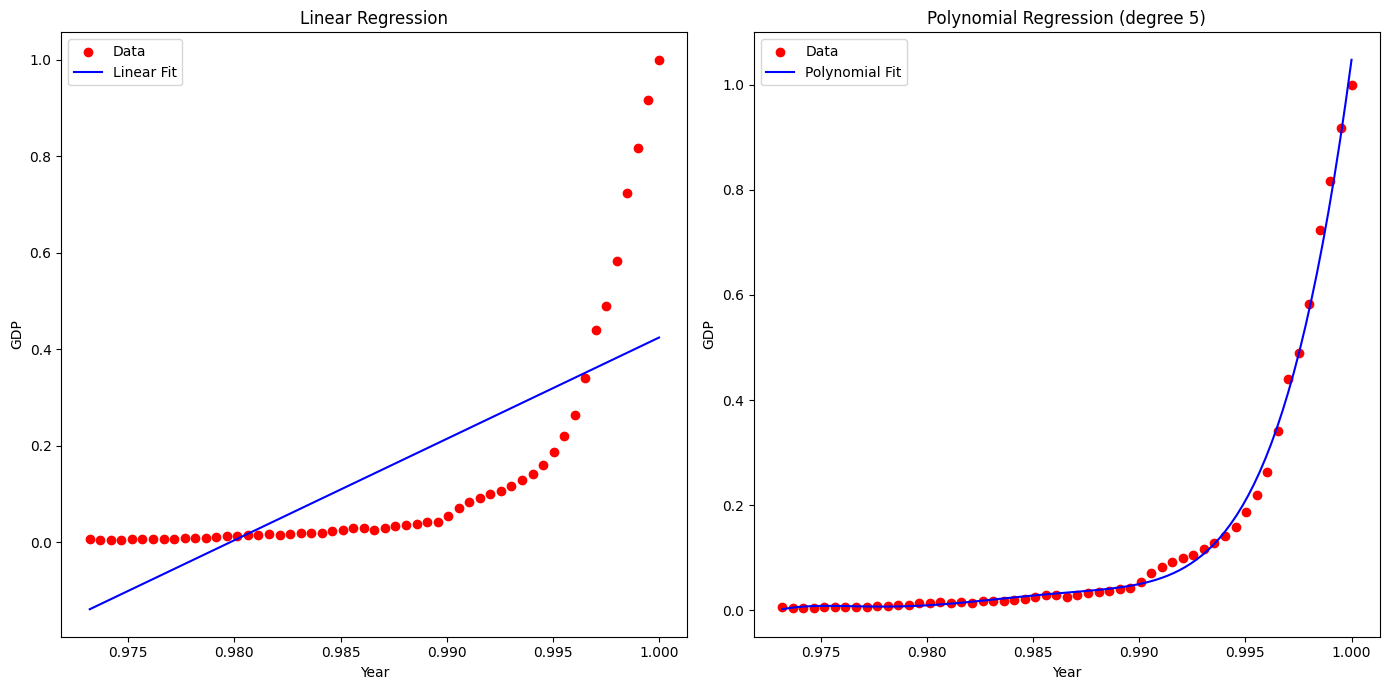

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load and normalize data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv")
X = np.asanyarray(df[['Year']] / df['Year'].max())
y = np.asanyarray(df[['Value']] / df['Value'].max())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train Polynomial Regression Model
degree = 5
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predictions
new_years = np.array([[2025], [2030], [2040]])
new_years_normalized = new_years / df['Year'].max()
y_pred_linear_new = linear_model.predict(new_years_normalized)
new_years_poly = poly.transform(new_years_normalized)
y_pred_poly_new = poly_model.predict(new_years_poly)

# Denormalize predictions
y_pred_linear_new_denorm = y_pred_linear_new * df['Value'].max()
y_pred_poly_new_denorm = y_pred_poly_new * df['Value'].max()

# Output predictions
print("New Data Predictions:")
for year, pred_linear, pred_poly in zip(new_years.flatten(), y_pred_linear_new_denorm.flatten(), y_pred_poly_new_denorm.flatten()):
    print(f"Year: {year}, Linear Regression Prediction: {pred_linear:.4f}, Polynomial Regression Prediction: {pred_poly:.4f}")

# Plot results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Data')
plt.plot(X, linear_model.predict(X), color='blue', label='Linear Fit')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('Linear Regression')
plt.legend()

plt.subplot(1, 2, 2)
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_range = poly_model.predict(x_range_poly)
plt.scatter(X, y, color='red', label='Data')
plt.plot(x_range, y_range, color='blue', label='Polynomial Fit')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title(f'Polynomial Regression (degree {degree})')
plt.legend()

plt.tight_layout()
plt.show()


# **5. Clustering, Classification vs Regression**
---
1. **Clustering** is a method used to group similar data points together based on certain features or characteristics. It's an unsupervised learning technique, meaning it doesn't require labeled data. Clustering is useful for exploratory data analysis, pattern recognition, and segmentation tasks.

2. **Classification** is a supervised learning technique where the goal is to categorize data points into predefined classes or labels based on their features. It's used when the output is categorical or discrete. Classification algorithms learn from labeled data to make predictions on unseen data.

3. **Regression** is another supervised learning technique used to predict continuous numerical values based on input features. Unlike classification, where the output is categorical, regression models predict a continuous value. Regression analysis helps in understanding the relationship between variables and making predictions based on that relationship.
----
Here are examples illustrating each concept:

1. **Clustering**: Suppose you have a dataset containing customer purchase history with features like age, income, and purchase frequency. Using clustering, you can group similar customers together based on these features to identify segments such as "high-income frequent buyers," "young occasional buyers," and "senior infrequent buyers."

2. **Classification**: Imagine you have a dataset of emails labeled as spam or non-spam, along with features like email subject, sender, and content. You can build a classification model to predict whether new emails are spam or not based on these features. Algorithms like logistic regression, decision trees, or support vector machines can be used for this task.

3. **Regression**: Consider a dataset containing information about houses, including features like square footage, number of bedrooms, and location, as well as their corresponding sale prices. You can train a regression model to predict the price of a house based on its features. Examples of regression algorithms include linear regression, decision tree regression, and random forest regression.

# **6. 'groupby'**
----
We have this data




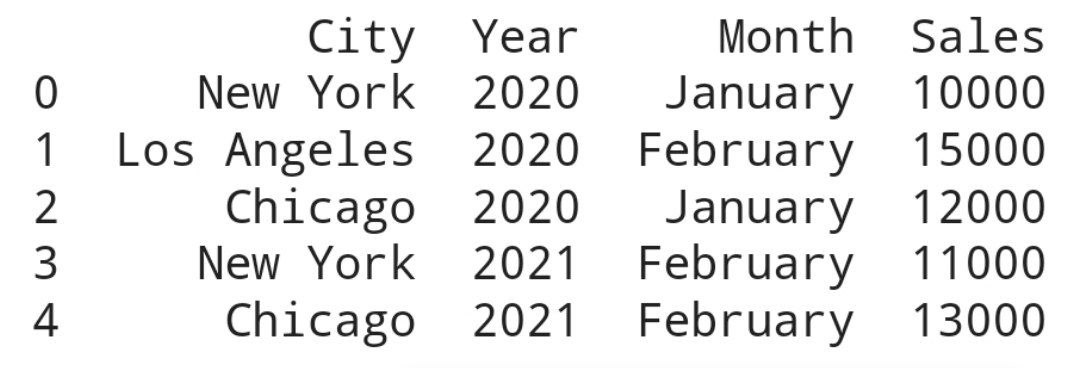

Question: What was the average sales per month across all cities for each year?

`df.groupby(["Year","Month"])["Sales"].mean()`:

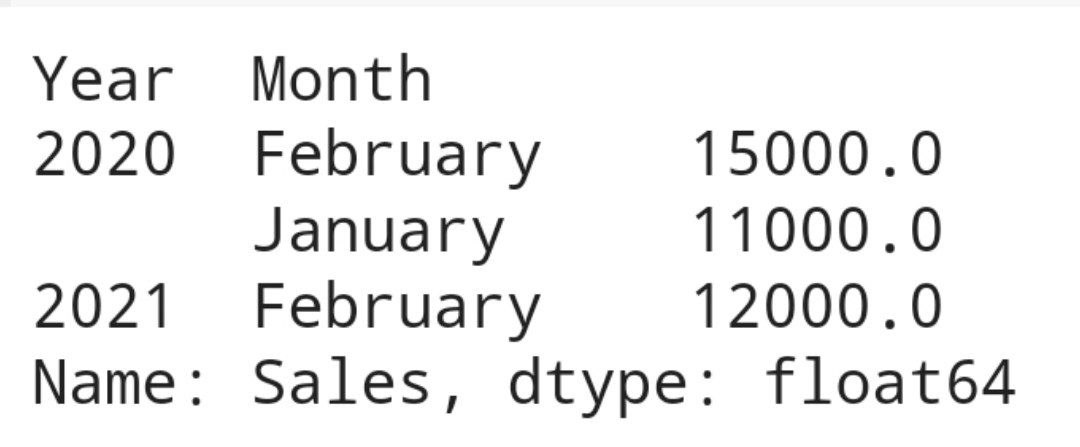

----
`df.groupby(["Year", "Month"])["Sales"].agg([min,max,np.mean])`

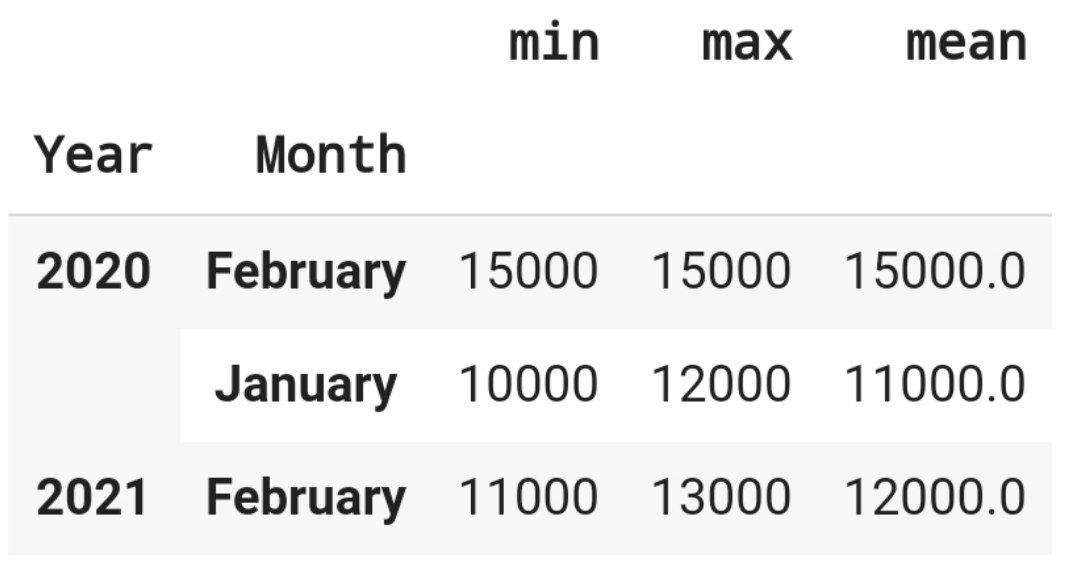

# **7. Hyperparameters in a Decision Tree Classifier**
---
Not using these parameters in a Decision Tree Classifier can lead to potential problems like overfitting or underfitting, depending on the complexity of your data and the specific task. However, it is generally recommended to use these parameters to fine-tune the model and achieve a balance between complexity and performance. Here's why they are important and how to use them effectively:

### **1. `min_impurity_decrease`**

- **Purpose:** Controls the quality of splits.
- **Recommendation:** **Use this parameter** to avoid creating splits that do not significantly improve the model. Setting it to a reasonable value can prevent the tree from growing too large and overfitting the training data.

### **2. `max_depth`**

- **Purpose:** Limits the depth of the tree.
- **Recommendation:** **Use this parameter** to prevent the tree from becoming too deep and complex, which can lead to overfitting. A well-chosen `max_depth` can help the model generalize better to unseen data.

### **3. `min_samples_leaf`**

- **Purpose:** Ensures a minimum number of samples in each leaf node.
- **Recommendation:** **Use this parameter** to make sure that leaf nodes have enough samples, which helps avoid creating branches that capture noise in the data. This can improve the generalization of the model.

### **Best Practices**

1. **Grid Search/Cross-Validation:**
   - Use techniques like grid search with cross-validation to find the best values for these parameters. This helps in optimizing the tree's performance and ensures it generalizes well to unseen data.

2. **Understand Your Data:**
   - Adjust these parameters based on the size and complexity of your dataset. For smaller datasets, you might need more conservative settings to avoid overfitting, while for larger datasets, more flexibility might be beneficial.

3. **Monitor Performance:**
   - Evaluate the performance of your model on a validation set or through cross-validation to determine the impact of these parameters. Fine-tuning them helps in finding a balance between overfitting and underfitting.

### **Summary**

**Do use these parameters** to control and optimize your decision tree. They are essential for managing the trade-off between model complexity and performance. Ignoring them can lead to suboptimal models, either overfitting the training data or failing to capture the necessary patterns.

---------------------------------
# **how to use GrisSearch CV to find the best for all?**
To find the best hyperparameters for a Decision Tree Classifier (or any model) using Grid Search with Cross-Validation, you can use `GridSearchCV` from `scikit-learn`. Grid Search systematically works through multiple combinations of parameter values, evaluates the performance using cross-validation, and selects the best combination.

Here’s a step-by-step guide to using `GridSearchCV` to tune hyperparameters like `min_impurity_decrease`, `max_depth`, and `min_samples_leaf` for a Decision Tree Classifier:

### **Step-by-Step Guide**

1. **Import Libraries:**

   First, ensure you have the necessary libraries imported:
   ```python
   import numpy as np
   import pandas as pd
   from sklearn.datasets import load_iris
   from sklearn.model_selection import GridSearchCV
   from sklearn.tree import DecisionTreeClassifier
   from sklearn.model_selection import train_test_split
   ```

2. **Load and Prepare Data:**

   Load your dataset and split it into training and test sets:
   ```python
   # Example with Iris dataset
   data = load_iris()
   X = data.data
   y = data.target

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
   ```

3. **Define the Parameter Grid:**

   Create a dictionary where the keys are parameter names and the values are lists of values to try:
   ```python
   param_grid = {
       'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2],
       'max_depth': [None, 10, 20, 30],
       'min_samples_leaf': [1, 2, 5, 10]
   }
   ```

4. **Initialize the Model and GridSearchCV:**

   Create an instance of `DecisionTreeClassifier` and `GridSearchCV`:
   ```python
   dt = DecisionTreeClassifier(random_state=42)

   grid_search = GridSearchCV(estimator=dt,
                              param_grid=param_grid,
                              cv=5,  # Number of folds in cross-validation
                              scoring='accuracy',  # Metric to optimize
                              verbose=1,  # Verbosity level
                              n_jobs=-1)  # Use all available cores
   ```

5. **Fit the GridSearchCV:**

   Fit `GridSearchCV` to your training data:
   ```python
   grid_search.fit(X_train, y_train)
   ```

6. **Get the Best Parameters and Model:**

   After fitting, retrieve the best parameters and the best model:
   ```python
   best_params = grid_search.best_params_
   best_model = grid_search.best_estimator_

   print("Best Parameters:", best_params)
   ```

7. **Evaluate the Best Model:**

   Evaluate the best model on the test set:
   ```python
   from sklearn.metrics import accuracy_score

   y_pred = best_model.predict(X_test)
   accuracy = accuracy_score(y_test, y_pred)

   print("Test Set Accuracy:", accuracy)
   ```

### **Explanation of Key Components**

- **`param_grid`:** Specifies the range of hyperparameters to search.
- **`GridSearchCV`:** Automates the process of finding the best hyperparameters using cross-validation.
- **`cv`:** Number of cross-validation folds. More folds give a better estimate but take longer to compute.
- **`scoring`:** Metric used to evaluate model performance. For classification, common metrics include `'accuracy'`, `'f1'`, `'roc_auc'`, etc.
- **`verbose`:** Controls the verbosity of the output. `1` provides basic information; higher numbers provide more details.
- **`n_jobs`:** Number of jobs to run in parallel. `-1` uses all available cores.

### **Summary**

By using `GridSearchCV`, you can efficiently search through multiple combinations of hyperparameters to find the best ones for your Decision Tree Classifier. This process helps optimize the model’s performance and improve its generalization to new data.

# **8. Models Comparison: where each one should be used?**
---
Sure, let's rewrite the explanations with recommendations for alternative models based on the specific disadvantages.

### **1. Logistic Regression**

**Example:** Predicting whether a customer will buy a product based on their age and income.

- **Advantage:** Based on the probability, each parameter shows its importance.
  - **Example:** In the customer prediction model, you can see which factor (age or income) is more influential in the purchasing decision.
- **Disadvantage:** Requires that the logistic correlation between columns is correctly specified.
  - **Example:** If age and income have a non-linear relationship, logistic regression may not model the data well.
- **Recommendation:** **Kernel SVM** could handle non-linear relationships better by using the kernel trick to map features to higher dimensions.

### **2. K-Nearest Neighbors (K-NN)**

**Example:** Classifying handwritten digits (0-9) from image data.

- **Advantage:** Simple, fast, and effective.
  - **Example:** For the digit classification, K-NN can quickly classify a new digit by finding the most similar images in the training set.
- **Disadvantage:** The K-value must be chosen correctly for good performance.
  - **Example:** If K is too low, the model may be too sensitive to noise. If K is too high, the model may smooth out important details.
- **Recommendation:** **Random Forest** could be a better choice as it is less sensitive to parameter selection and can handle both classification and regression tasks effectively.

### **3. Support Vector Machine (SVM)**

**Example:** Identifying whether an email is spam or not based on its content.

- **Advantage:** Efficient, insensitive to unusual values, avoids overfitting.
  - **Example:** SVM can effectively classify spam emails even if there are some unusual words that don't fit the general pattern.
- **Disadvantage:** Not suitable for multi-column (high-dimensional) datasets and does not handle non-linear problems well without a kernel trick.
  - **Example:** If the email dataset has many features (words), a linear SVM might struggle without using a kernel to map to a higher-dimensional space.
- **Recommendation:** **Kernel SVM** can handle non-linear relationships better with the appropriate kernel function, such as the RBF kernel.

### **4. Kernel SVM**

**Example:** Classifying types of flowers based on petal and sepal dimensions.

- **Advantage:** Can handle non-linear relationships using the kernel trick.
  - **Example:** The relationship between flower types and their measurements might be non-linear, and a kernel SVM can find a non-linear decision boundary.
- **Disadvantage:** Doesn't fit multi-column (high-dimensional) datasets well without proper tuning.
  - **Example:** If the flower dataset has many features (e.g., soil type, sunlight hours), tuning the kernel parameters becomes critical.
- **Recommendation:** **Random Forest** can handle high-dimensional datasets better by averaging the results of multiple decision trees, reducing overfitting and improving performance.

### **5. Decision Tree**

**Example:** Predicting whether a loan applicant will default based on credit score, income, and other factors.

- **Advantage:** Easy to understand, handle parameter tuning, and interpret. Handles both numerical and categorical data.
  - **Example:** You can visualize the decision tree to see the path leading to a default prediction, making it easy to understand which factors are most important.
- **Disadvantage:** Prone to overfitting, especially on small datasets.
  - **Example:** If the loan dataset is small, the decision tree might create overly complex rules that don't generalize well.
- **Recommendation:** **Random Forest** is a better option as it reduces overfitting by averaging the results from multiple decision trees.

### **6. Random Forest**

**Example:** Predicting patient response to different drugs based on their medical history and genetic information.

- **Advantage:** High accuracy and performs well on various problems by averaging the results of multiple decision trees.
  - **Example:** Random Forest can aggregate predictions from multiple trees, reducing the risk of overfitting and improving accuracy on the drug response prediction.
- **Disadvantage:** Difficult to understand and interpret individual trees. Prone to overfitting if the number of trees and their depth are not controlled properly.
  - **Example:** While the overall prediction is accurate, understanding why a particular patient is recommended a specific drug can be challenging.
- **Recommendation:** **Logistic Regression** might be a simpler model for understanding the importance of each feature, but **Random Forest** generally provides better performance for complex datasets.

### **Conclusion**

Using examples helps to illustrate how each model works in real-world scenarios. When choosing a model, consider the nature of your data, the problem you're solving, and the trade-offs between simplicity, interpretability, and accuracy. Each model has its own set of strengths and weaknesses, making it suitable for different types of tasks and datasets. By understanding the advantages and disadvantages, you can select the most appropriate model or a combination of models for your specific project.

----
## **Here are five real-world project examples for each model to help you differentiate the types of problems each model is best suited for:**

### **1. Logistic Regression**

1. **Credit Card Fraud Detection**:
   - Predict whether a transaction is fraudulent based on features such as transaction amount, location, and time.
2. **Customer Churn Prediction**:
   - Determine if a customer is likely to cancel a subscription based on their usage patterns and customer service interactions.
3. **Disease Diagnosis**:
   - Predict the presence of a disease (e.g., diabetes) based on patient medical history and test results.
4. **Marketing Campaign Response**:
   - Identify which customers are likely to respond to a marketing campaign based on their demographic and behavioral data.
5. **Email Spam Detection**:
   - Classify emails as spam or not spam based on their content, sender, and other features.

### **2. K-Nearest Neighbors (K-NN)**

1. **Handwritten Digit Recognition**:
   - Classify digits (0-9) in handwritten images using pixel values as features.
2. **Recommendation Systems**:
   - Recommend products to users based on the preferences of similar users.
3. **Customer Segmentation**:
   - Group customers into segments based on purchasing behavior and demographic information.
4. **Stock Price Prediction**:
   - Predict stock prices based on historical prices and trading volumes.
5. **Medical Diagnosis**:
   - Classify medical conditions based on patient symptoms and test results.

### **3. Support Vector Machine (SVM)**

1. **Image Classification**:
   - Classify images into categories (e.g., cats vs. dogs) based on pixel values or extracted features.
2. **Text Classification**:
   - Categorize text documents (e.g., news articles) into predefined categories.
3. **Face Detection**:
   - Identify faces in images or video streams using pixel intensity features.
4. **Credit Risk Assessment**:
   - Evaluate the creditworthiness of loan applicants based on their financial history and application data.
5. **Protein Classification**:
   - Classify proteins into different types based on their amino acid sequences.

### **4. Kernel SVM**

1. **Non-Linear Boundary Classification**:
   - Classify data points where the decision boundary is non-linear, such as classifying different types of cancer cells.
2. **Sentiment Analysis**:
   - Determine the sentiment (positive or negative) of product reviews or social media posts.
3. **Voice Recognition**:
   - Identify speakers based on voice features extracted from audio samples.
4. **Weather Prediction**:
   - Predict weather conditions based on historical weather data and atmospheric readings.
5. **Fraud Detection**:
   - Detect fraudulent transactions where the relationships between features are non-linear.

### **5. Decision Tree**

1. **Loan Approval**:
   - Decide whether to approve a loan application based on applicant details like income, credit score, and employment history.
2. **Customer Support Automation**:
   - Classify customer queries into categories for automated response systems.
3. **Sales Prediction**:
   - Predict future sales based on historical sales data and external factors like seasonality and market trends.
4. **Employee Attrition**:
   - Predict which employees are likely to leave the company based on their performance, job satisfaction, and other factors.
5. **Disease Outbreak Prediction**:
   - Predict the likelihood of disease outbreaks based on environmental and demographic factors.

### **6. Random Forest**

1. **Customer Lifetime Value Prediction**:
   - Estimate the lifetime value of customers based on their purchasing behavior and demographic data.
2. **House Price Prediction**:
   - Predict house prices based on features like location, size, and number of bedrooms.
3. **Risk Assessment**:
   - Assess the risk of insurance claims based on customer data and historical claims.
4. **Energy Consumption Forecasting**:
   - Predict future energy consumption for households or industries based on past usage patterns and external factors.
5. **Product Recommendation**:
   - Recommend products to customers based on their past purchases and browsing history.

### **Conclusion**

These examples illustrate the diverse applications of each model. By understanding the strengths and weaknesses of each model and seeing practical examples, you can better choose the right model for your specific problem.

---

### **1. Logistic Regression**

**Example:** Predicting whether a customer will buy a product based on their age and income.

- **Advantage:** Based on the probability, each parameter shows its importance.
  - **Example:** In the customer prediction model, you can see which factor (age or income) is more influential in the purchasing decision.
- **Disadvantage:** Requires that the logistic correlation between columns is correctly specified.
  - **Example:** If age and income have a non-linear relationship, logistic regression may not model the data well.
- **Recommendation:** **Kernel SVM** could handle non-linear relationships better by using the kernel trick to map features to higher dimensions. (Alternative models: **Random Forest**, **Gradient Boosting Machines**)

**Real-World Examples:**

1. **Credit Card Fraud Detection:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.
2. **Customer Churn Prediction:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.
3. **Disease Diagnosis:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.
4. **Marketing Campaign Response:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.
5. **Email Spam Detection:**
   - **Alternative models:** **Naive Bayes**, **Support Vector Machine**.

### **2. K-Nearest Neighbors (K-NN)**

**Example:** Classifying handwritten digits (0-9) from image data.

- **Advantage:** Simple, fast, and effective.
  - **Example:** For digit classification, K-NN can quickly classify a new digit by finding the most similar images in the training set.
- **Disadvantage:** The K-value must be chosen correctly for good performance.
  - **Example:** If K is too low, the model may be too sensitive to noise. If K is too high, the model may smooth out important details.
- **Recommendation:** **Random Forest** could be a better choice as it is less sensitive to parameter selection and can handle both classification and regression tasks effectively. (Alternative models: **Support Vector Machine**, **Neural Networks**)

**Real-World Examples:**

1. **Handwritten Digit Recognition:**
   - **Alternative models:** **Support Vector Machine**, **Convolutional Neural Networks**.
2. **Recommendation Systems:**
   - **Alternative models:** **Collaborative Filtering**, **Matrix Factorization**.
3. **Customer Segmentation:**
   - **Alternative models:** **K-Means Clustering**, **Hierarchical Clustering**.
4. **Stock Price Prediction:**
   - **Alternative models:** **ARIMA**, **LSTM Networks**.
5. **Medical Diagnosis:**
   - **Alternative models:** **Random Forest**, **Support Vector Machine**.

### **3. Support Vector Machine (SVM)**

**Example:** Identifying whether an email is spam or not based on its content.

- **Advantage:** Efficient, insensitive to unusual values, avoids overfitting.
  - **Example:** SVM can effectively classify spam emails even if there are some unusual words that don't fit the general pattern.
- **Disadvantage:** Not suitable for multi-column (high-dimensional) datasets and does not handle non-linear problems well without a kernel trick.
  - **Example:** If the email dataset has many features (words), a linear SVM might struggle without using a kernel to map to a higher-dimensional space.
- **Recommendation:** **Kernel SVM** can handle non-linear relationships better with the appropriate kernel function, such as the RBF kernel. (Alternative models: **Random Forest**, **Gradient Boosting Machines**)

**Real-World Examples:**

1. **Image Classification:**
   - **Alternative models:** **Convolutional Neural Networks**, **Random Forest**.
2. **Text Classification:**
   - **Alternative models:** **Naive Bayes**, **Neural Networks**.
3. **Face Detection:**
   - **Alternative models:** **Convolutional Neural Networks**, **Region-based CNN**.
4. **Credit Risk Assessment:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.
5. **Protein Classification:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.

### **4. Kernel SVM**

**Example:** Classifying types of flowers based on petal and sepal dimensions.

- **Advantage:** Can handle non-linear relationships using the kernel trick.
  - **Example:** The relationship between flower types and their measurements might be non-linear, and a kernel SVM can find a non-linear decision boundary.
- **Disadvantage:** Doesn't fit multi-column (high-dimensional) datasets well without proper tuning.
  - **Example:** If the flower dataset has many features (e.g., soil type, sunlight hours), tuning the kernel parameters becomes critical.
- **Recommendation:** **Random Forest** can handle high-dimensional datasets better by averaging the results of multiple decision trees, reducing overfitting and improving performance. (Alternative models: **Gradient Boosting Machines**, **Neural Networks**)

**Real-World Examples:**

1. **Non-Linear Boundary Classification:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.
2. **Sentiment Analysis:**
   - **Alternative models:** **Naive Bayes**, **Neural Networks**.
3. **Voice Recognition:**
   - **Alternative models:** **Deep Neural Networks**, **Recurrent Neural Networks**.
4. **Weather Prediction:**
   - **Alternative models:** **Random Forest**, **LSTM Networks**.
5. **Fraud Detection:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.

### **5. Decision Tree**

**Example:** Predicting whether a loan applicant will default based on credit score, income, and other factors.

- **Advantage:** Easy to understand, handle parameter tuning, and interpret. Handles both numerical and categorical data.
  - **Example:** You can visualize the decision tree to see the path leading to a default prediction, making it easy to understand which factors are most important.
- **Disadvantage:** Prone to overfitting, especially on small datasets.
  - **Example:** If the loan dataset is small, the decision tree might create overly complex rules that don't generalize well.
- **Recommendation:** **Random Forest** is a better option as it reduces overfitting by averaging the results from multiple decision trees. (Alternative models: **Gradient Boosting Machines**, **Logistic Regression**)

**Real-World Examples:**

1. **Loan Approval:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.
2. **Customer Support Automation:**
   - **Alternative models:** **Naive Bayes**, **Neural Networks**.
3. **Sales Prediction:**
   - **Alternative models:** **Random Forest**, **Gradient Boosting Machines**.
4. **Employee Attrition:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.
5. **Disease Outbreak Prediction:**
   - **Alternative models:** **Random Forest**, **Neural Networks**.

### **6. Random Forest**

**Example:** Predicting patient response to different drugs based on their medical history and genetic information.

- **Advantage:** High accuracy and performs well on various problems by averaging the results of multiple decision trees.
  - **Example:** Random Forest can aggregate predictions from multiple trees, reducing the risk of overfitting and improving accuracy on the drug response prediction.
- **Disadvantage:** Difficult to understand and interpret individual trees. Prone to overfitting if the number of trees and their depth are not controlled properly.
  - **Example:** While the overall prediction is accurate, understanding why a particular patient is recommended a specific drug can be challenging.
- **Recommendation:** **Logistic Regression** might be a simpler model for understanding the importance of each feature, but **Random Forest** generally provides better performance for complex datasets. (Alternative models: **Gradient Boosting Machines**, **Neural Networks**)

**Real-World Examples:**

1. **Customer Lifetime Value Prediction:**
   - **Alternative models:** **Gradient Boosting Machines**, **Neural Networks**.
2. **House Price Prediction:**
   - **Alternative models:** **Gradient Boosting Machines**, **Neural Networks**.
3. **Risk Assessment:**
   - **Alternative models:** **Gradient Boosting Machines**, **Logistic Regression**.
4. **Energy Consumption Forecasting:**
   - **Alternative models:** **Gradient Boosting Machines**, **LSTM Networks**.
5. **Product Recommendation:**
   - **Alternative models:** **Collaborative Filtering**, **Matrix Factorization**.

### **Conclusion**

Each model has its own set of strengths and weaknesses, making it suitable for different types of tasks and datasets. By understanding the advantages and disadvantages, and considering alternative models, you can select the most appropriate model or combination of models for your specific project.